
Best solution found: [ 0.02727797  0.00967121 -0.00174594  0.01629473  0.0013925   0.01466088
  0.01618146  0.0113757   0.01291395 -0.01546007  0.04097669 -0.03617994
 -0.00892263 -0.0119869  -0.01156035  0.00146757 -0.00057541 -0.03396248
 -0.02875656  0.01407914  0.0247555  -0.00230113 -0.01324446 -0.00578831
 -0.0159772  -0.0064839   0.01857876 -0.00833765 -0.03789495 -0.03460352
  0.05581246  0.00950763  0.01659906 -0.01061736 -0.01605834  0.00634115
 -0.04170441  0.02960299  0.04087027  0.01440205 -0.0299678   0.01388814
  0.03884333 -0.01482785 -0.0102545   0.03849392 -0.01228644 -0.00293868
 -0.01041496 -0.02101386]
Fitness value: 5.0015


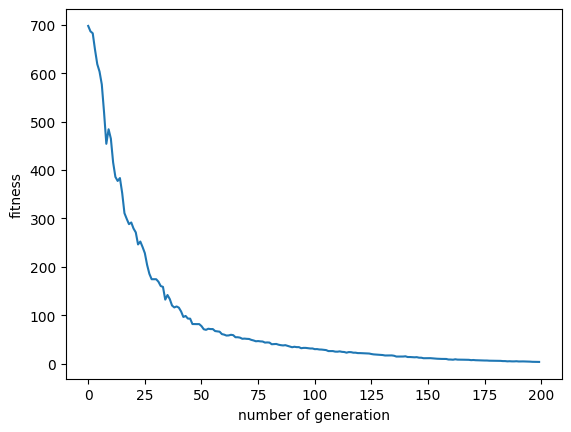

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 1000   # Number of individuals in each generation
num_parents = 500        # Number of parents selected to breed
num_variables = 50        # Number of parameters to optimize (dimensions for Rastrigin)
num_generations = 200    # Number of generations
crossover_rate = 0.8     # Probability of crossover
mutation_rate = 0.01     # Probability of mutation
mutation_range = 1       # Range of mutation

# Range for Rastrigin function variables (-5.12 to 5.12 for each variable)
variable_range = (-5.12, 5.12)

# Initialize population with random real numbers within the range
population = np.random.uniform(variable_range[0], variable_range[1], size=(population_size, num_variables))

def rastrigin(x): 
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def calculate_fitness(population):
    fitness = np.array([rastrigin(individual) for individual in population])
    return fitness

def crossover(parents, crossover_rate, population_size):
    num_parents = parents.shape[0]
    num_variables = parents.shape[1]

    offspring_population = np.zeros((population_size, num_variables))
    current_count = 0

    while current_count < population_size:
        shuffled_indices = np.random.permutation(num_parents)
        shuffled_parents = parents[shuffled_indices, :]

        for i in range(0, num_parents, 2):
            if current_count >= population_size:
                break

            if i == num_parents - 1:
                offspring_population[current_count, :] = shuffled_parents[i, :]
                current_count += 1
            else:
                parent1 = shuffled_parents[i, :]
                parent2 = shuffled_parents[i + 1, :]

                if np.random.rand() < crossover_rate:
                    crossover_point = np.random.randint(1, num_variables)
                    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
                else:
                    offspring1 = parent1
                    offspring2 = parent2

                offspring_population[current_count, :] = offspring1
                current_count += 1

                if current_count < population_size:
                    offspring_population[current_count, :] = offspring2
                    current_count += 1

    return offspring_population

def mutate(new_population, mutation_rate, mutation_range):
    population_size = new_population.shape[0]
    num_variables = new_population.shape[1]

    mutated_population = new_population.copy()

    for i in range(population_size):
        for j in range(num_variables):
            if np.random.rand() < mutation_rate:
                mutation_value = (np.random.rand() - 0.5) * 2 * mutation_range
                mutated_population[i, j] = mutated_population[i, j] + mutation_value
                mutated_population[i, j] = max(variable_range[0], min(variable_range[1], mutated_population[i, j]))

    return mutated_population

fit_plot = np.zeros(num_generations)

for i in range(num_generations):
    fitness = calculate_fitness(population)
    parents = population[np.argsort(fitness)[:num_parents]]         # min :numparents  max -num_parents:
#    parents = population[np.argsort(fitness)[-num_parents:]]

    offspring_population = crossover(parents, crossover_rate, population_size)
    population = mutate(offspring_population, mutation_rate, mutation_range)

    best_fitness = np.min(fitness)  # min / max 
    fit_plot[i] = best_fitness
   # print(f"Generation {generation}: Best Fitness = {best_fitness:.4f}")


plt.plot(fit_plot)
plt.ylabel("fitness")
plt.xlabel("number of generation")
best_solution = population[np.argmin(fitness)]
print(f"\nBest solution found: {best_solution}")
print(f"Fitness value: {rastrigin(best_solution):.4f}")
